## Exercise in Photogrammetry II
# Ex. 07 Kalman Filter
### Submission: 05.02.2021 
### Points: 20

### A. Bayes Rule
Use the Bayes rule 
$$P(A|B)= \frac{P(B|A)P(A)}{P(B)}$$
to solve following problem:

  Last year 100 students have taken the exam in mathematics.
  50 of them passed the exam. 42 out of these 50 have been doing homeworks.
  There is only one student who did the homeworks but failed the exam.
  
  
**Task**
1.   Find the probability for a student to pass the exam, given he has done all the homeworks. Therefore, solve the following tasks:
    1. Name each of the probabilities $[P(A|B),P(B|A),P(A),P(B)]$ in the context of this task. (2 Points)
      - E.g. P(A|B)= Probabilitiy of ... given ...
    2. Compute the probability for the given values. (2 Points)

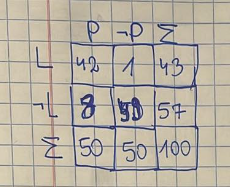

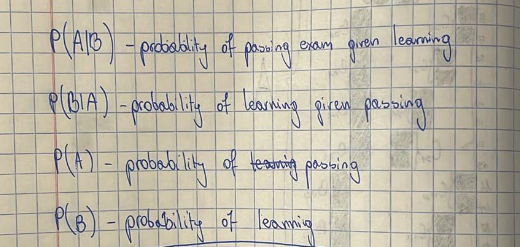

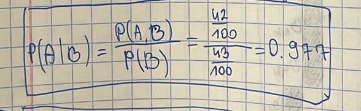

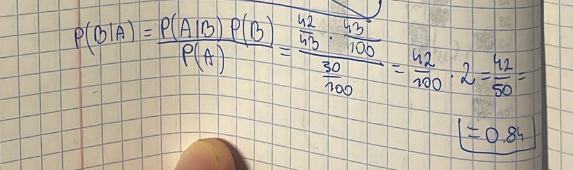

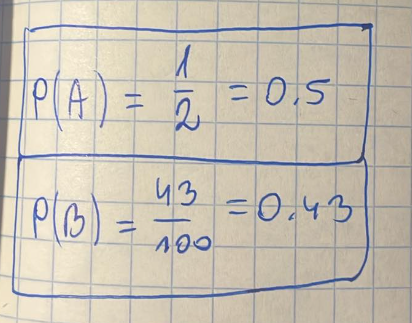

### B. Kalman Filter
In the lecture you got to know the Kalman Filter as a realization of the Bayes filter where you assume a linear model and gaussian distributed noise. In this exercise, you need to estimate the height and velocity of a falling object in ${R}^1$ recursively for specific time intervals of $t=1$ seconds.

Assume the initial state of the object to be given by its height $y=95.5$ m and velocity $v=0$ $\frac{m}{s}$ and corresponding uncertainties $\sigma_y^2=0.25$ and $\sigma_v^2=0.05$. We assume a motion with uniform acceleration of $a=1$ $\frac{m}{s^2}$ which we will treat as a control command. In addition, you observe the height of the falling object for five consecutive time steps $z = [96.4, 95.9, 94.4, 87.7, 85.3]$ m with $\sigma_z^2=0.5$.
The covariance of the process noise is given as follwing: 
    $${\Sigma}_t = \begin{pmatrix} 0.1 & 0 \\ 0 & 0.1 \end{pmatrix}$$

**Tasks:**
2. What are the unknows of your state vector $\mathbf{x}_t$? (1 Point)
3. Write down the linear model $\mathbf{x}_t=\mathbf{A}_t\mathbf{x}_{t-1} + \mathbf{B}_t \mathbf{u}_t$ explicitly and print the matrices $\mathbf{A}_t$, $\mathbf{B}_t$ to the terminal. (3 Points)
4. Write down the linear model $\mathbf{z}_t=\mathbf{C}_t \mathbf{x}_t$ explicitly and print the matrix $\mathbf{C}_t$ to the terminal. (2 Points)
5. Recursively estimate the state $\mathbf{x}_t$ of the falling object for five consecutive time steps according to the Kalman Filter.
For each time step visualize the predicted heigth of $\bar{\mathbf{x}}_t$, the observation $\mathbf{z}_t$ and the posteriori state estimate $\mathbf{x}_t$. Plot time steps on the x-axis and height on the y-axis. (6)
6. Assume the measurements of your sensor to be unreliable. This time set the uncertainty $\sigma_z^2=1e^8$ and recursively estimate the state. Visualize your results and explain the behaviour of the Kalman Filter. (2 Points)
7. Assume the measurements of your sensor to be nearly perfect. This time set the uncertainty $\sigma_z^2=1e^{-8}$ and recursively estimate the state. Visualize your results and explain the behaviour of the Kalman Filter. (2 Points)


In [1]:
import numpy as np

In [2]:
# Task 2.
# The unknowns of my state vector x_t are 
# y_t - height at time t,
# v_t - velocity at time t.

In [3]:
# Task 3.
delta_t = 1
A_t = np.array([[1, delta_t], [0, 1]])
B_t = np.array([[1/2 * (delta_t ** 2)], [delta_t]])
print(A_t)
print(A_t.shape)
print(B_t)
print(B_t.shape)

[[1 1]
 [0 1]]
(2, 2)
[[0.5]
 [1. ]]
(2, 1)


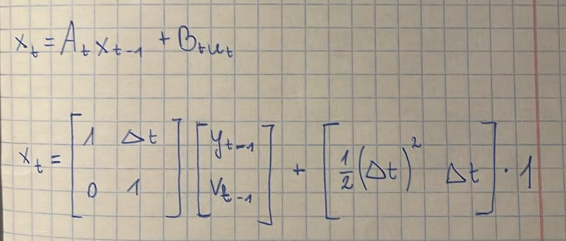

In [4]:
# Task 4.
C_t = np.array([[1, 0]])
print(C_t)

[[1 0]]


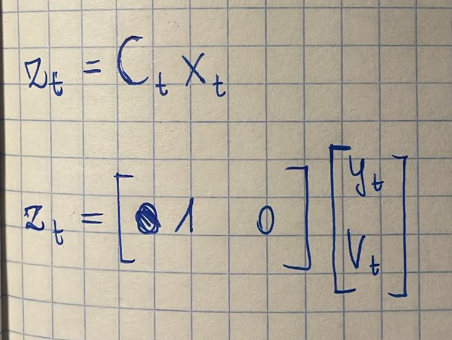

In [9]:
# Task 5. https://youtu.be/E-6paM_Iwfc?si=wp6ih8tnYeyxrW6q&t=2047
def kalman_filter(mean_prev, covariance_prev, control, observation):

    # Prediction.
    mean_pred = (A_t @ mean_prev + B_t * control)
    covariance_pred = A_t @ covariance_prev @ A_t.T + R_t

    # Correction.
    kalman_gain = covariance_pred @ C_t.T @ np.linalg.inv(C_t @ covariance_pred @ C_t.T + Q_t)
    mean = mean_pred + kalman_gain @ (observation - C_t @ mean_pred)
    covariance = (np.eye(len(mean_prev)) - kalman_gain @ C_t) @ covariance_pred

    return mean, covariance

In [14]:
initial_height = 95.5
initial_velocity = 0
acceleration = np.array([1])
observation_data = np.array([96.4, 95.9, 94.4, 87.7, 85.3])
m = np.array([[initial_height], [initial_velocity]])
cov = np.diag([0.25, 0.05]) # Initial covariance (uncertainties).
R_t = np.array([[0.1, 0],[0, 0.1]]) # Covariance of the process noise.

Q_t = np.array([0.5]) # Uncertainty of the observation.

for i in range(len(observation_data)):
    m, cov = kalman_filter(m, cov, acceleration, np.array([[observation_data[i]]]))
    print(m[0])

[96.17777778]
[96.77804878]
[96.24578523]
[91.53937832]
[87.58273225]


In [15]:
# Task 6.
Q_t = np.array([1e+8]) # Very unreliable observations.
for i in range(len(observation_data)):
    m, cov = kalman_filter(m, cov, acceleration, np.array([[observation_data[i]]]))
    print(m[0])

[87.14359907]
[87.70446602]
[89.26533307]
[91.82619967]
[95.38706535]


#### Here we completely ignore our observations, so we didn't observe the change of direction of velocity, and thus we think our object keeps accelerating up.

In [16]:
# Task 7.
Q_t = np.array([1e-8]) # Very reliable observations.
for i in range(len(observation_data)):
    m, cov = kalman_filter(m, cov, acceleration, np.array([[observation_data[i]]]))
    print(m[0])

[96.4]
[95.90000014]
[94.40000013]
[87.70000028]
[85.29999998]


#### Here we trust in the observations all the way, completely ignoring any prediction.

#### And not gonna lie, I really need to look into this Kalman stuff a bit more. I completely don't get why can't we just fully rely on our observations like in the last task. The photogrammetric series was nice! I hope me from the future will smile upon seeing all those struggles :) I've learned alot! It was fun couple of months :) Kosma out! 02:28 in the night, Piłsudskiego, 30.04.2024